In [2]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

the number of keypoint: 7213


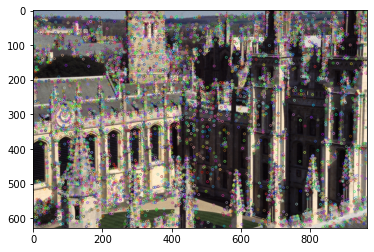

In [5]:
import cv2
import matplotlib.pyplot as plt
# Task1 - 1(a)
img = cv2.imread("House.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = SiftDetector(params = None)
kp,des = sift.detector.detectAndCompute(gray, None)
kp_gray = cv2.drawKeypoints(img, kp, gray)
kp_gray = cv2.cvtColor(kp_gray, cv2.COLOR_BGR2RGB)
print(f'the number of keypoint: {len(kp)}')
plt.imshow(kp_gray)

the number of keypoint: 72


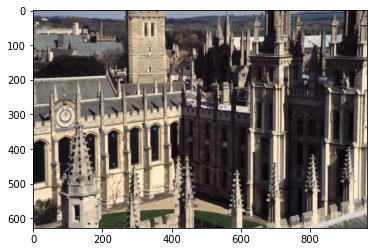

In [50]:
# Task1 - 1(b)
pa = {
    'n_features': 0,
    'n_octave_layers': 3,
    'contrast_threshold': 0.238,
    'edge_threshold': 10,
    'sigma': 1.6
}
sift = SiftDetector(params = pa)
kp,des = sift.detector.detectAndCompute(gray, None)
kp_gray = cv2.drawKeypoints(img, kp, gray)
kp_gray = cv2.cvtColor(kp_gray, cv2.COLOR_BGR2RGB)
print(f'the number of keypoint: {len(kp)}')
plt.imshow(kp_gray)

Task1 - 1(b) description : I tried to change the value of the parameter contrastThreshold or nfeatures and finally found when contrastThreshold = 0.238,
the number of keypoints becomes about 10% of all default keypoints.

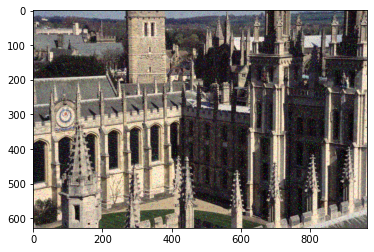

In [7]:
# Task2 - 2(a)
import matplotlib.pyplot as plt
from skimage import io,util

img = io.imread("House.png")

image_sp = util.random_noise(img, mode="s&p") 
plt.imshow(image_sp)


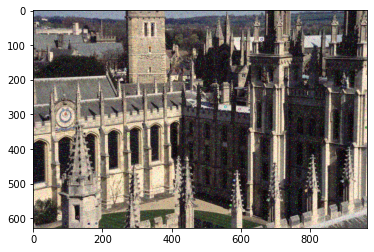

In [8]:
# Task2 - 2(b)
pa = {
    'n_features': 0,
    'n_octave_layers': 3,
    'contrast_threshold': 0.238,
    'edge_threshold': 10,
    'sigma': 1.6
}
img_p = io.imread("House.png")
image_sp = util.random_noise(img_p, mode="s&p")
image_sp=cv2.normalize(image_sp,None,0,255,cv2.NORM_MINMAX).astype('uint8')
gray2 = cv2.cvtColor(image_sp, cv2.COLOR_BGR2GRAY)
sift = SiftDetector(params = pa)
kp,des = sift.detector.detectAndCompute(gray2, None)
kp_gray2 = cv2.drawKeypoints(image_sp, kp, gray2)

plt.imshow(kp_gray2)


# Task2 - 2(c)
Yes, the scaling of the image does not affect how the algorithm matches keypoints

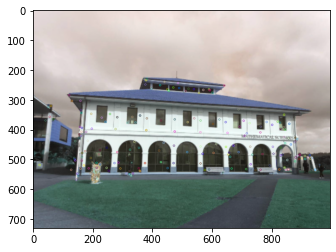

In [95]:
# Task3 - 3(a)
pa = {
    'n_features': 0,
    'n_octave_layers': 3,
    'contrast_threshold': 0.12,
    'edge_threshold': 10,
    'sigma': 1.6
}
img_s = cv2.imread("Scene1.png")
gray_s = cv2.cvtColor(img_s, cv2.COLOR_BGR2GRAY)
sift = SiftDetector(params = pa)
kp_s,des = sift.detector.detectAndCompute(gray_s, None)
kp_gray_s = cv2.drawKeypoints(img_s, kp_s, gray_s)
kp_gray_s = cv2.cvtColor(kp_gray_s, cv2.COLOR_BGR2RGB)
plt.imshow(kp_gray_s)

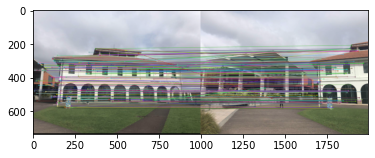

In [7]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("Scene1.png")
img2 = cv2.imread("Scene2.png")

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 1v1 mapping
bf = cv2.BFMatcher(crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
# multi mapping
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img4 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
plt.imshow(img4)


(1068,)
(1068, 128)
(1515,)
(1515, 128)
(226, 2)
(226, 2)


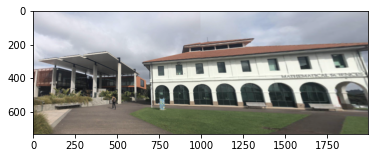

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def matchKeyPoints(bf, kptA, dpA, kptB, dpB):
    src_matches = bf.knnMatch(dpA, dpB, k=2)
    good_pts = []
    for res in src_matches:
        if len(res) == 2:
            m, n = res  
            if m.distance < 0.75 * n.distance:
   
                good_pts.append((m.trainIdx, m.queryIdx))

    if len(good_pts) > 4:
        pts_src = np.float32([kptA[j] for (_, j) in good_pts])  
        print(pts_src.shape)
        pts_dst = np.float32([kptB[i] for (i, _) in good_pts])
        print(pts_dst.shape)

    
        H, status = cv2.findHomography(pts_src, pts_dst, cv2.RANSAC, ransacReprojThreshold=4.0)
        return H
    return None

def detectKeyPoints(sift, img):
    kps, dps = sift.detectAndCompute(img, None)
    kpts = np.float32([kp.pt for kp in kps]) 
    print(np.array(kps).shape)
    print(dps.shape)
    return kpts, dps

imgA_SRC = cv2.imread("Scene1.png")
imgB_SRC = cv2.imread("Scene2.png")
list_e = []
for i in range(730):
    list_e.append(imgB_SRC[i])
imgB_SRC = np.array(list_e)

imgA = cv2.cvtColor(imgA_SRC, cv2.COLOR_BGR2GRAY)
h_A, w_A = imgA.shape
imgB = cv2.cvtColor(imgB_SRC, cv2.COLOR_BGR2GRAY)
h_B, w_B = imgB.shape

sift = cv2.SIFT_create()
kptA, dpA = detectKeyPoints(sift, imgA)
kptB, dpB = detectKeyPoints(sift, imgB)

bf = cv2.BFMatcher()
homography = matchKeyPoints(bf, kptA, dpA, kptB, dpB)
  
im_out = cv2.warpPerspective(imgA_SRC, homography, (w_A + w_B, h_A))
im_out[0: h_B, 0: w_B, :] = imgB_SRC
plt.imshow(im_out)
 




